![ieseg logo](./img/ieseg.png)

#### MBD 2017-2018
# Statistical & Machine Learning Approaches for Marketing

## Section 4: Tree-Based Methods

**1. Import all required libraries and datasets**

In [2]:
# Set environment params
Sys.setenv(LANG='en')  # English

# Import libraries
library(data.table)  # Data manipulate
library(mlr)         # ML toolkit
library(caret)       # ML toolkit
library(ggplot2)     # Visualization
library(pROC)        # AUC, ROC
library(tree)        # CART model

# Import data
library(ISLR)      # Data from the course book
library(MASS)      # Boston housing dataset
library(datasets)  # US crime dataset

# Resize plot
library(repr)  # String and binary representations
#options(repr.plot.width=4, repr.plot.height=4)

NameError: name 'library' is not defined

**2. First ideas about Decision Tree**

In [572]:
# Student performance dataset
# G1, G2, G3: first period, second period and final grade (numeric: from 0 to 20)
student <- read.csv('./data/student/student-mat.csv', sep=';')
student$pass <- as.factor(ifelse(student$G3 >= 10, 'Y', 'N'))
str(student[, c('G1', 'G2', 'pass')])

'data.frame':	395 obs. of  3 variables:
 $ G1  : int  5 5 7 15 6 15 12 6 16 14 ...
 $ G2  : int  6 5 8 14 10 15 12 5 18 15 ...
 $ pass: Factor w/ 2 levels "N","Y": 1 1 2 2 2 2 2 1 2 2 ...


In [554]:
# Build simple decision tree model from Titanic dataset
md_tree <- tree(pass ~ G1 + G2, data=student)

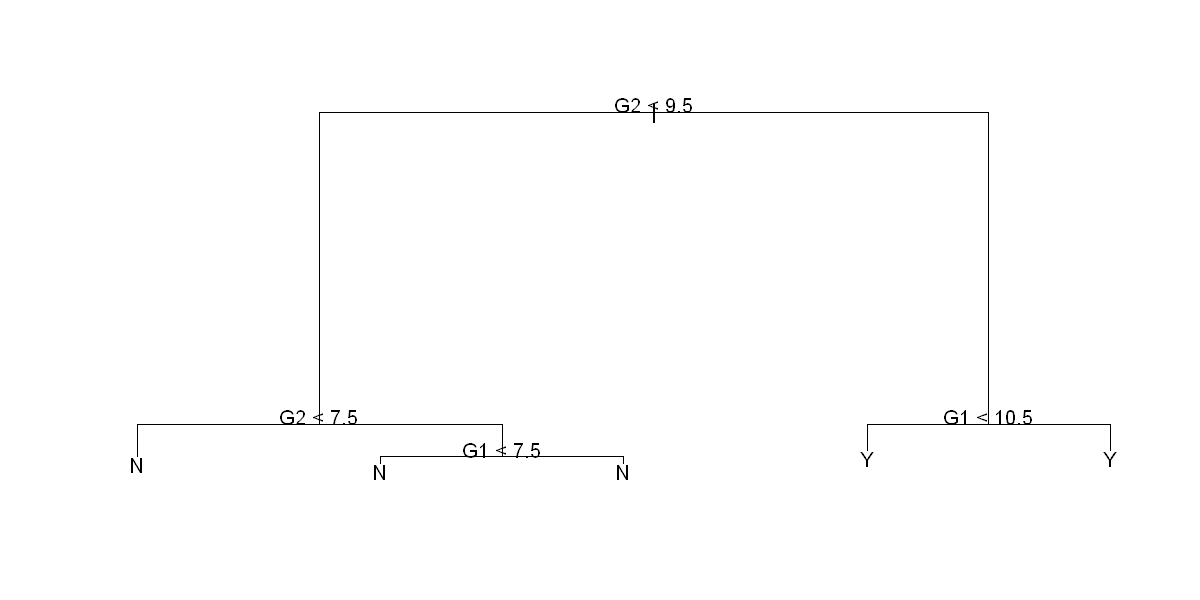

In [555]:
# Plot the tree
options(repr.plot.width=10, repr.plot.height=5)
par(cex.lab=0.8, cex.axis=0.8, cex.main=0.8, cex.sub=0.8)
plot(md_tree)
text(md_tree, pretty=1)

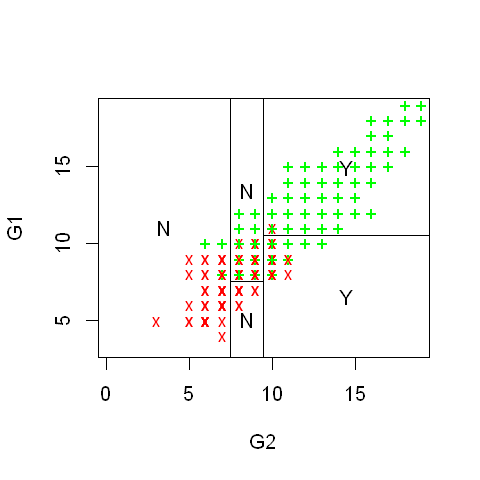

In [571]:
# Plot the partition of tree
options(repr.plot.width=4, repr.plot.height=4)
partition.tree(md_tree)
points(student$G1, student$G2,
       pch=c('x', '+')[as.numeric(student$pass)],
       col=c('red', 'green')[as.numeric(student$pass)],
       cex=0.9)

In [475]:
# Print out the tree details
print(md_tree)

node), split, n, deviance, yval, (yprob)
      * denotes terminal node

 1) root 395 500.500 Y ( 0.32911 0.67089 )  
   2) G2 < 9.5 146 130.500 N ( 0.83562 0.16438 )  
     4) G2 < 7.5 64   0.000 N ( 1.00000 0.00000 ) *
     5) G2 > 7.5 82  99.140 N ( 0.70732 0.29268 )  
      10) G1 < 7.5 16   7.481 N ( 0.93750 0.06250 ) *
      11) G1 > 7.5 66  85.340 N ( 0.65152 0.34848 ) *
   3) G2 > 9.5 249  70.750 Y ( 0.03213 0.96787 )  
     6) G1 < 10.5 54  45.300 Y ( 0.14815 0.85185 ) *
     7) G1 > 10.5 195   0.000 Y ( 0.00000 1.00000 ) *


**3. Regression Trees**

In [573]:
# Inport the Baseball Players' data in 1987
# Source: https://cran.r-project.org/web/packages/ISLR/ISLR.pdf
ht <- ISLR::Hitters
str(ht[, c('Salary', 'Years', 'RBI', 'Hits', 'PutOuts', 'Walks', 'Runs')])

'data.frame':	322 obs. of  7 variables:
 $ Salary : num  NA 475 480 500 91.5 750 70 100 75 1100 ...
 $ Years  : int  1 14 3 11 2 11 2 3 2 13 ...
 $ RBI    : int  29 38 72 78 42 51 8 24 32 66 ...
 $ Hits   : int  66 81 130 141 87 169 37 73 81 92 ...
 $ PutOuts: int  446 632 880 200 805 282 76 121 143 0 ...
 $ Walks  : int  14 39 76 37 30 35 21 7 8 65 ...
 $ Runs   : int  30 24 66 65 39 74 23 24 26 49 ...


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   67.5   190.0   425.0   535.9   750.0  2460.0      59 

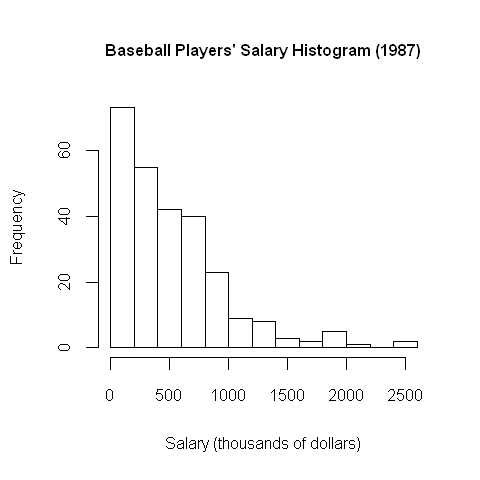

In [514]:
# Observe the annual salary value (in thousands of dollars)
summary(ht$Salary)

options(repr.plot.width=4, repr.plot.height=4)
par(cex.lab=0.8, cex.axis=0.8, cex.main=0.8, cex.sub=0.8)
hist(ht$Salary,
     main="Baseball Players' Salary Histogram (1987)",
     xlab='Salary (thousands of dollars)')

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  4.212   5.247   6.052   5.927   6.620   7.808 

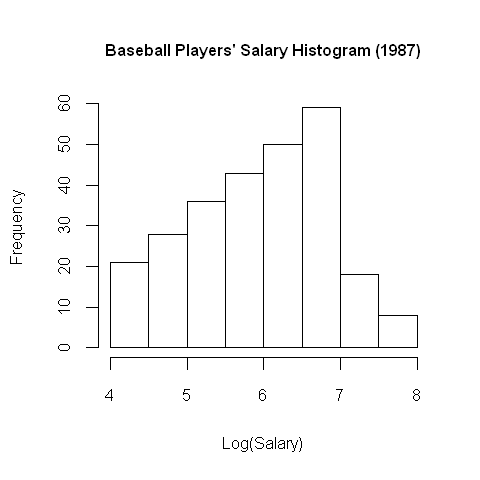

In [515]:
# Drop obs. with Salary == NA
ht <- ht[!is.na(ht$Salary), ]

# Log-transform Salary
ht$Salary <- log(ht$Salary)

# Print out to check
summary(ht$Salary)

# Plot the transformed Salary
options(repr.plot.width=4, repr.plot.height=4)
par(cex.lab=0.8, cex.axis=0.8, cex.main=0.8, cex.sub=0.8)
hist(ht$Salary,
     main="Baseball Players' Salary Histogram (1987)",
     xlab='Log(Salary)')

In [520]:
# Train-test split
set.seed(1)  # High variance
train_idx <- sample(1:nrow(ht), 132)
train_ht <- ht[train_idx, ]  # 132 obs.
test_ht <- ht[-train_idx, ]  # 131 obs.

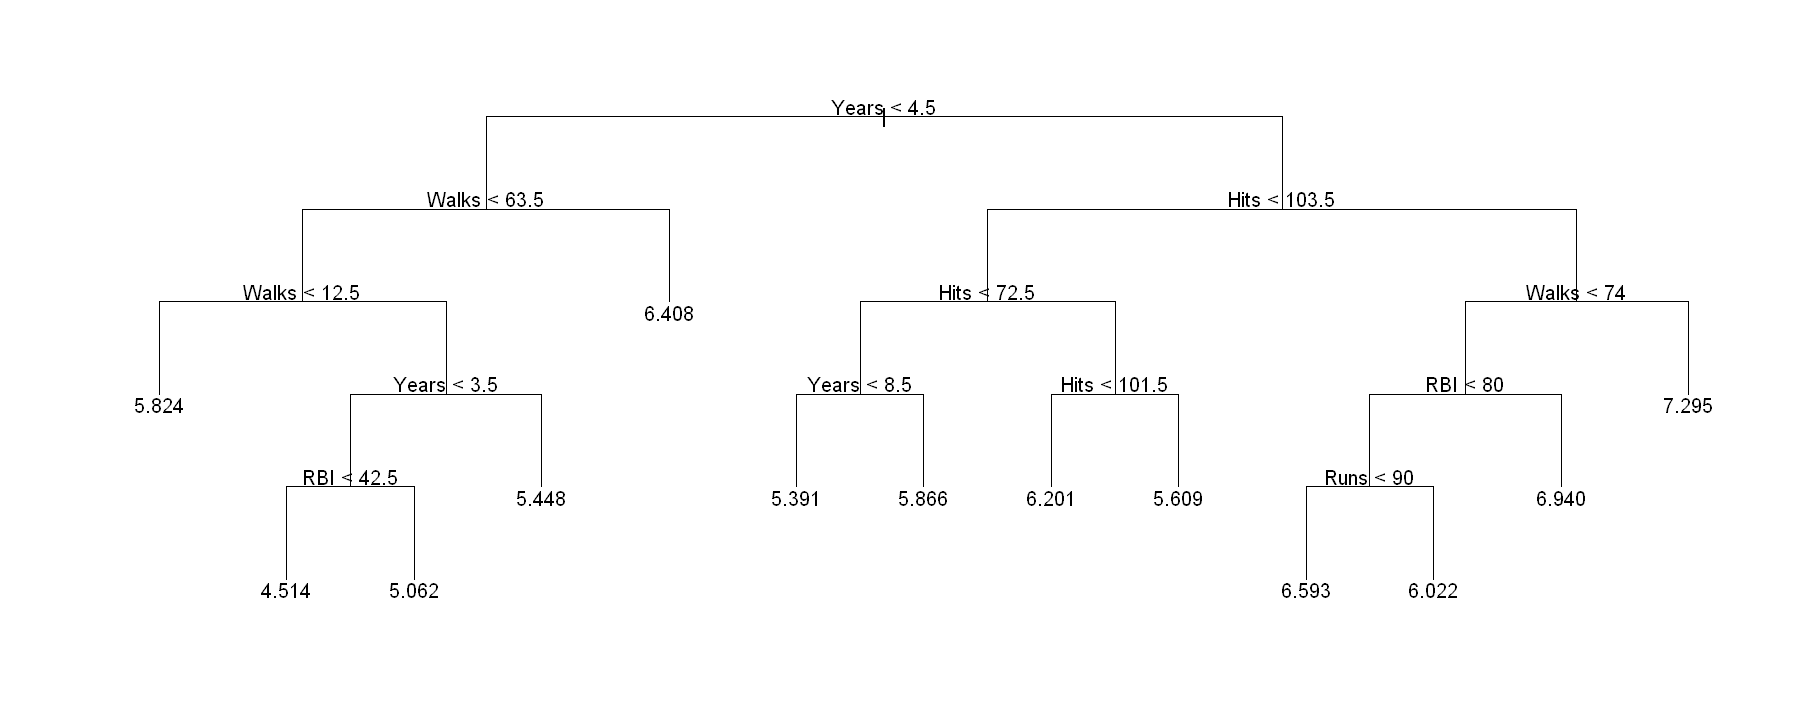

In [578]:
# Fit full regression tree (top-down greedy splitting)
md_regtree <- tree(Salary ~ Years + RBI + Hits + PutOuts + Walks + Runs, data=train_ht)

# Plot the regression tree
options(repr.plot.width=15, repr.plot.height=6)
plot(md_regtree, type='uniform')
text(md_regtree, pretty=0)

In [522]:
# Print out the tree details
md_regtree

node), split, n, deviance, yval
      * denotes terminal node

 1) root 132 102.4000 5.948  
   2) Years < 4.5 43  29.2000 5.236  
     4) Walks < 63.5 38  20.3500 5.082  
       8) Walks < 12.5 5   7.7230 5.824 *
       9) Walks > 12.5 33   9.4580 4.970  
        18) Years < 3.5 21   2.4850 4.697  
          36) RBI < 42.5 14   0.7316 4.514 *
          37) RBI > 42.5 7   0.3552 5.062 *
        19) Years > 3.5 12   2.6630 5.448 *
     5) Walks > 63.5 5   1.0850 6.408 *
   3) Years > 4.5 89  40.9000 6.292  
     6) Hits < 103.5 43  11.5500 5.854  
      12) Hits < 72.5 20   3.5450 5.604  
        24) Years < 8.5 11   1.0190 5.391 *
        25) Years > 8.5 9   1.4080 5.866 *
      13) Hits > 72.5 23   5.6610 6.072  
        26) Hits < 101.5 18   2.3430 6.201 *
        27) Hits > 101.5 5   1.9510 5.609 *
     7) Hits > 103.5 46  13.4300 6.701  
      14) Walks < 74 38   8.4540 6.576  
        28) RBI < 80 30   6.5560 6.479  
          56) Runs < 90 24   1.8390 6.593 *
          57) Runs >

In [527]:
# RSS at the root (or 1st node)
rss_node_1 <- sum((train_ht$Salary - mean(train_ht$Salary)) ^ 2)

# RSS at the first left branch (or 2nd node)
R1 <- train_ht[train_ht$Years < 4.5, ]
rss_node_2 <- sum((R1$Salary - mean(R1$Salary)) ^ 2)

# RSS at the first right branch (or 3rd node)
R2 <- train_ht[train_ht$Years >= 4.5, ]
rss_node_3 <- sum((R2$Salary - mean(R2$Salary)) ^ 2)

# Compare RSS
rss_node_1  # Max RSS, root (no split)
rss_node_2  # First split, left branch
rss_node_3  # Second split, right branch

[1] 102.4081

[1] 29.20288

[1] 40.89854

In [581]:
# Prune the Regression Tree
set.seed(1)
cv_regtree <- cv.tree(md_regtree)
cv_regtree

$size
 [1] 13 12 11 10  8  7  6  4  3  2  1

$dev
 [1]  68.00842  67.49624  65.03339  64.81482  64.47011  61.60375  63.36093
 [8]  62.52036  66.37425  77.34480 107.27308

$k
 [1]      -Inf  1.117601  1.367402  1.398098  1.454624  2.339659  3.420623
 [8]  3.737675  7.771405 15.926986 32.306659

$method
[1] "deviance"

attr(,"class")
[1] "prune"         "tree.sequence"

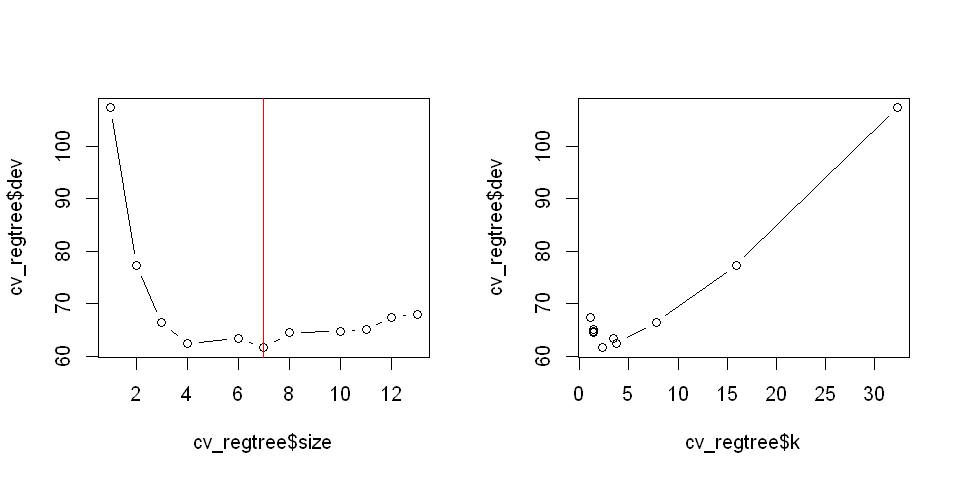

In [600]:
# Show the Decision Tree
options(repr.plot.width=8, repr.plot.height=4)
par(mfrow=c(1, 2))
plot(cv_regtree$size, cv_regtree$dev, type='b')  # Tree size, number of nodes
abline(v=7, col='red')  # Best tree size
plot(cv_regtree$k, cv_regtree$dev, type='b')  # Cost-complexity param, alpha

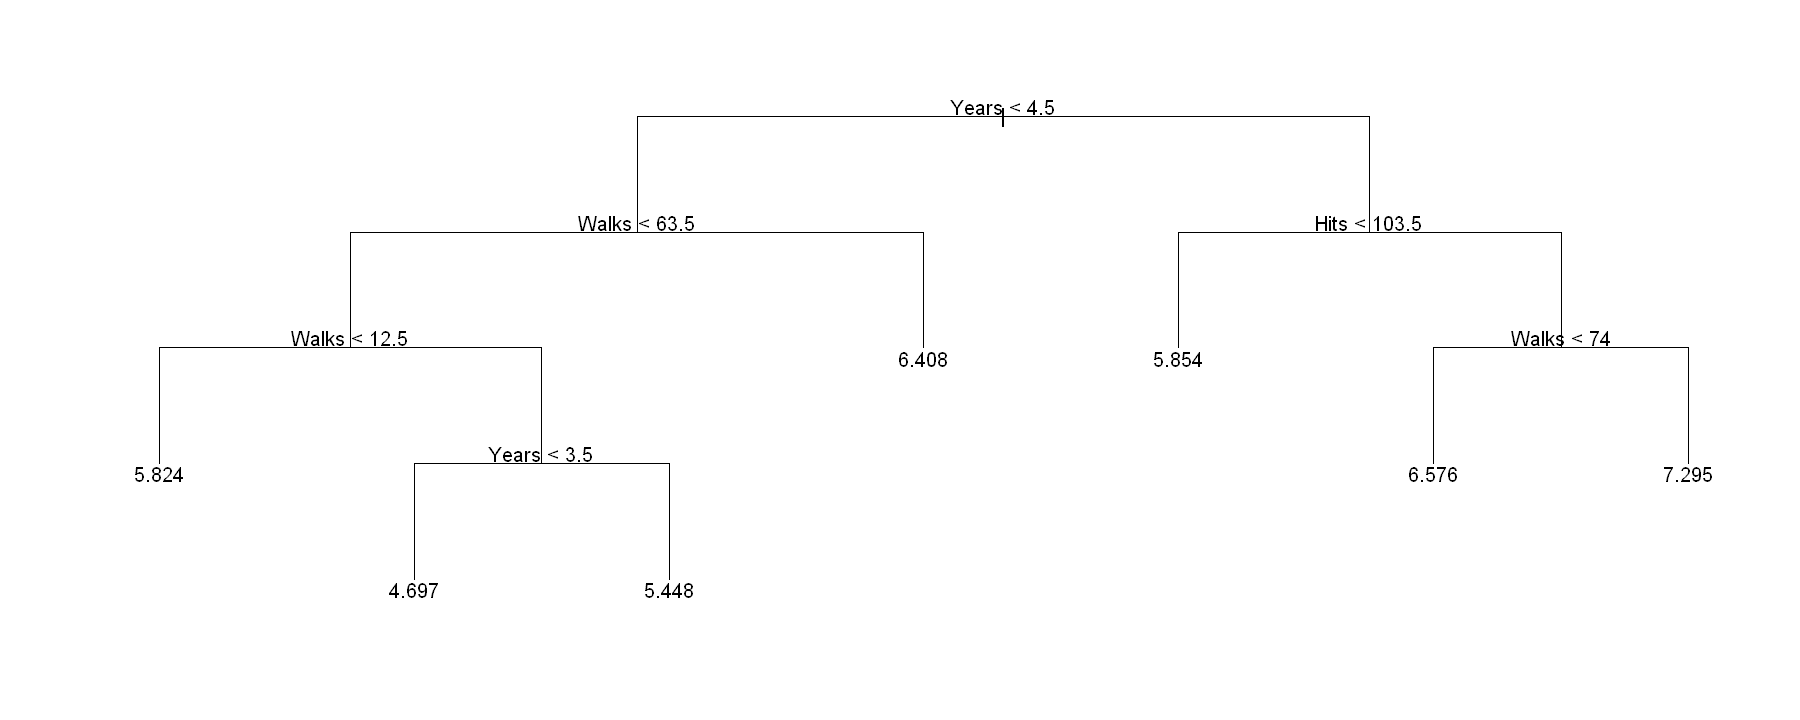

In [598]:
# Prune the tree to 7 nodes
prune_regtree <- prune.tree(md_regtree, best=7)

# Show the tree
options(repr.plot.width=15, repr.plot.height=6)
plot(prune_regtree, type='uniform')
text(prune_regtree, pretty=0)

In [599]:
# Compare the performance of full Regression Tree and pruned Regression Tree

# RSS full Regression Tree
pred_full_regtree <- predict(md_regtree, newdata=test_ht)
mse_full_regtree <- mean((pred_full_regtree - mean(test_ht$Salary)) ^ 2)
mse_full_regtree

# RSS pruned Regression Tree
pred_pruned_regtree <- predict(prune_regtree, newdata=test_ht)
mse_pruned_regtree <- mean((pred_pruned_regtree - mean(test_ht$Salary)) ^ 2)
mse_pruned_regtree

[1] 0.664125

[1] 0.6045753

**4. Classification Tree**

**4.1. The Iris dataset**
![ieseg logo](./img/iris-machinelearning.png)

Source: https://www.datacamp.com/community/tutorials/machine-learning-in-r

In [532]:
# The Iris dataset
ir <- datasets::iris
str(ir)

'data.frame':	150 obs. of  5 variables:
 $ Sepal.Length: num  5.1 4.9 4.7 4.6 5 5.4 4.6 5 4.4 4.9 ...
 $ Sepal.Width : num  3.5 3 3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 ...
 $ Petal.Length: num  1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 ...
 $ Petal.Width : num  0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 ...
 $ Species     : Factor w/ 3 levels "setosa","versicolor",..: 1 1 1 1 1 1 1 1 1 1 ...


In [533]:
# Check the response
table(ir$Species) / nrow(ir)


    setosa versicolor  virginica 
 0.3333333  0.3333333  0.3333333 

In [535]:
# Fit the classification tree
md_classtree <- tree(Species ~ ., data=ir)
summary(md_classtree)


Classification tree:
tree(formula = Species ~ ., data = ir)
Variables actually used in tree construction:
[1] "Petal.Length" "Petal.Width"  "Sepal.Length"
Number of terminal nodes:  6 
Residual mean deviance:  0.1253 = 18.05 / 144 
Misclassification error rate: 0.02667 = 4 / 150 

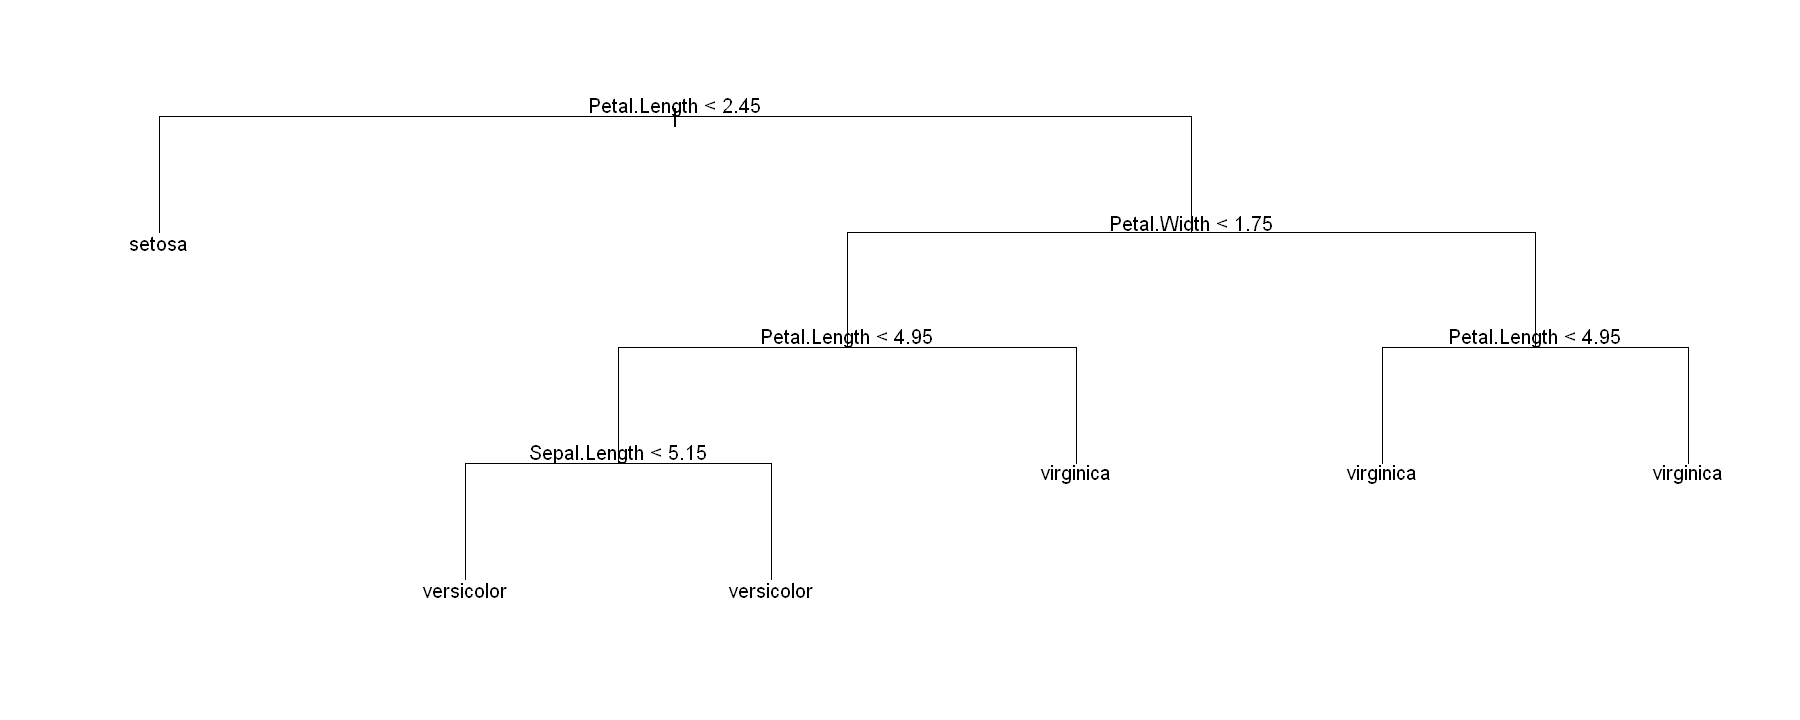

In [606]:
# Plot the classification tree
options(repr.plot.width=15, repr.plot.height=6)
plot(md_classtree, type='uniform')
text(md_classtree, pretty=0)

In [540]:
# Print out the tree details
md_classtree

node), split, n, deviance, yval, (yprob)
      * denotes terminal node

 1) root 150 329.600 setosa ( 0.33333 0.33333 0.33333 )  
   2) Petal.Length < 2.45 50   0.000 setosa ( 1.00000 0.00000 0.00000 ) *
   3) Petal.Length > 2.45 100 138.600 versicolor ( 0.00000 0.50000 0.50000 )  
     6) Petal.Width < 1.75 54  33.320 versicolor ( 0.00000 0.90741 0.09259 )  
      12) Petal.Length < 4.95 48   9.721 versicolor ( 0.00000 0.97917 0.02083 )  
        24) Sepal.Length < 5.15 5   5.004 versicolor ( 0.00000 0.80000 0.20000 ) *
        25) Sepal.Length > 5.15 43   0.000 versicolor ( 0.00000 1.00000 0.00000 ) *
      13) Petal.Length > 4.95 6   7.638 virginica ( 0.00000 0.33333 0.66667 ) *
     7) Petal.Width > 1.75 46   9.635 virginica ( 0.00000 0.02174 0.97826 )  
      14) Petal.Length < 4.95 6   5.407 virginica ( 0.00000 0.16667 0.83333 ) *
      15) Petal.Length > 4.95 40   0.000 virginica ( 0.00000 0.00000 1.00000 ) *

In [616]:
# Compare error rate
e12 <- 1 - 0.97917  # Node 12
e24 <- 1 - 0.80000  # Node 24
e25 <- 1 - 1.00000  # Node 25

e12
e24 * 5/48 + e25 * 43/48

# Compare cross-entropy (deviance)
d12 <- - 0.97917 * log(0.97917) - 0.02083 * log(0.02083)
d24 <- - 0.80000 * log(0.80000) - 0.20000 * log(0.20000)
d25 <- - 1.00000 * log(1.00000)

d12
d24 * 5/48 + d25 * 43/48

[1] 0.02083

[1] 0.02083333

[1] 0.101252

[1] 0.05212525

**4.2. Node impurity function for classification tree**

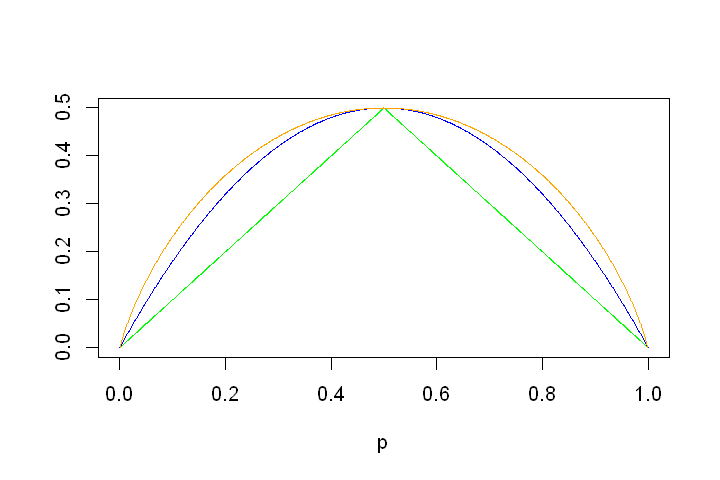

In [319]:
# Node impurity function for 2-class classification
error <- function(pmk) { pmin(1 - pmk, pmk) }  # Misclassification error
gini <- function(pmk) { pmk * (1 - pmk) + (1 - pmk) * pmk }  # Gini index
deviance <- function(pmk) { -pmk * log(pmk) - (1 - pmk) * log(1 - pmk) }  # Cross-entropy or deviance

# Create p value in [0; 1]
p <- seq(0, 1, 0.001)

# Scale deviance to range [0; 0.5]
custom_scale <- function(v, a, b) { (b - a) * (v - min(v, na.rm=T)) / (max(v, na.rm=T) - min(v, na.rm=T)) + a }

# Plot 3 inpurity function for 2-class classification
options(repr.plot.width=6, repr.plot.height=4)
plot(p, error(p), col='green', type='l', ylab='')
lines(p, gini(p), col='blue', type='l')
lines(p, custom_scale(deviance(p), 0, 0.5), col='orange', type='l')

## Lab: Decision Tree, Bagging and Boosting

1. Cars Sales Data - Classification Tree
2. Cars Sales Data - Regression Tree
3. Boston Housing Data - Bagging and Random Forests
4. Boston Housing Data - Boosting Regression Tree
5. Student's Performance - Benchmarking - Classification

### Lab 1: Cars Sales Data - Classification Tree

**1.1. Import, explore and prepare data**

In [478]:
# Load require packages
library(tree)  # Regression and classification tree
library(ISLR)  # Dataset

In [479]:
# Load and explore the dataset
cs <- ISLR::Carseats
str(cs)

'data.frame':	400 obs. of  11 variables:
 $ Sales      : num  9.5 11.22 10.06 7.4 4.15 ...
 $ CompPrice  : num  138 111 113 117 141 124 115 136 132 132 ...
 $ Income     : num  73 48 35 100 64 113 105 81 110 113 ...
 $ Advertising: num  11 16 10 4 3 13 0 15 0 0 ...
 $ Population : num  276 260 269 466 340 501 45 425 108 131 ...
 $ Price      : num  120 83 80 97 128 72 108 120 124 124 ...
 $ ShelveLoc  : Factor w/ 3 levels "Bad","Good","Medium": 1 2 3 3 1 1 3 2 3 3 ...
 $ Age        : num  42 65 59 55 38 78 71 67 76 76 ...
 $ Education  : num  17 10 12 14 13 16 15 10 10 17 ...
 $ Urban      : Factor w/ 2 levels "No","Yes": 2 2 2 2 2 1 2 2 1 1 ...
 $ US         : Factor w/ 2 levels "No","Yes": 2 2 2 2 1 2 1 2 1 2 ...


In [86]:
# Check NAs
apply(is.na(cs), 2, sum)

CompPrice      Income Advertising  Population       Price   ShelveLoc 
          0           0           0           0           0           0 
        Age   Education       Urban          US        High 
          0           0           0           0           0

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   5.390   7.490   7.496   9.320  16.270 

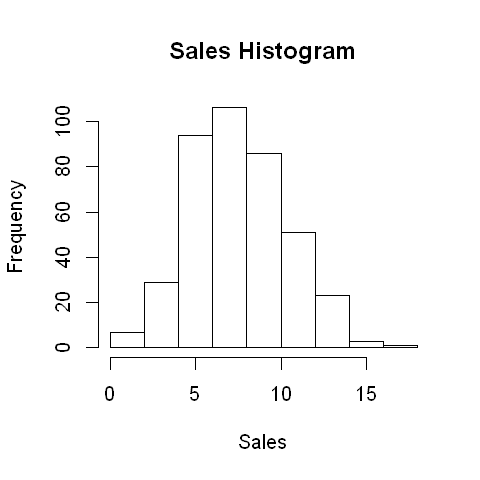

In [480]:
# Check the target variable
summary(cs$Sales)

options(repr.plot.width=4, repr.plot.height=4)
hist(cs$Sales,
     main='Sales Histogram', xlab='Sales')

In [481]:
# Create a new target variable for classification problem
cs$High <- as.factor(ifelse(cs$Sales <= 8, 'No', 'Yes'))
cs$Sales <- NULL  # Drop Sales


  No  Yes 
0.59 0.41 

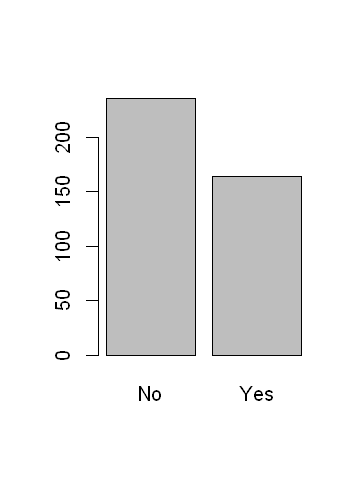

In [486]:
# Check the new target variable
table(cs$High) / nrow(cs)  # Almost balnaced

options(repr.plot.width=3, repr.plot.height=4)
barplot(table(cs$High))

**1.2. Quick test the Decision Tree model**

In [487]:
# Fit the Decision Tree model
md_tree <- tree(High ~ ., data=cs)
summary(md_tree)


Classification tree:
tree(formula = High ~ ., data = cs)
Variables actually used in tree construction:
[1] "ShelveLoc"   "Price"       "Income"      "CompPrice"   "Population" 
[6] "Advertising" "Age"         "US"         
Number of terminal nodes:  27 
Residual mean deviance:  0.4575 = 170.7 / 373 
Misclassification error rate: 0.09 = 36 / 400 

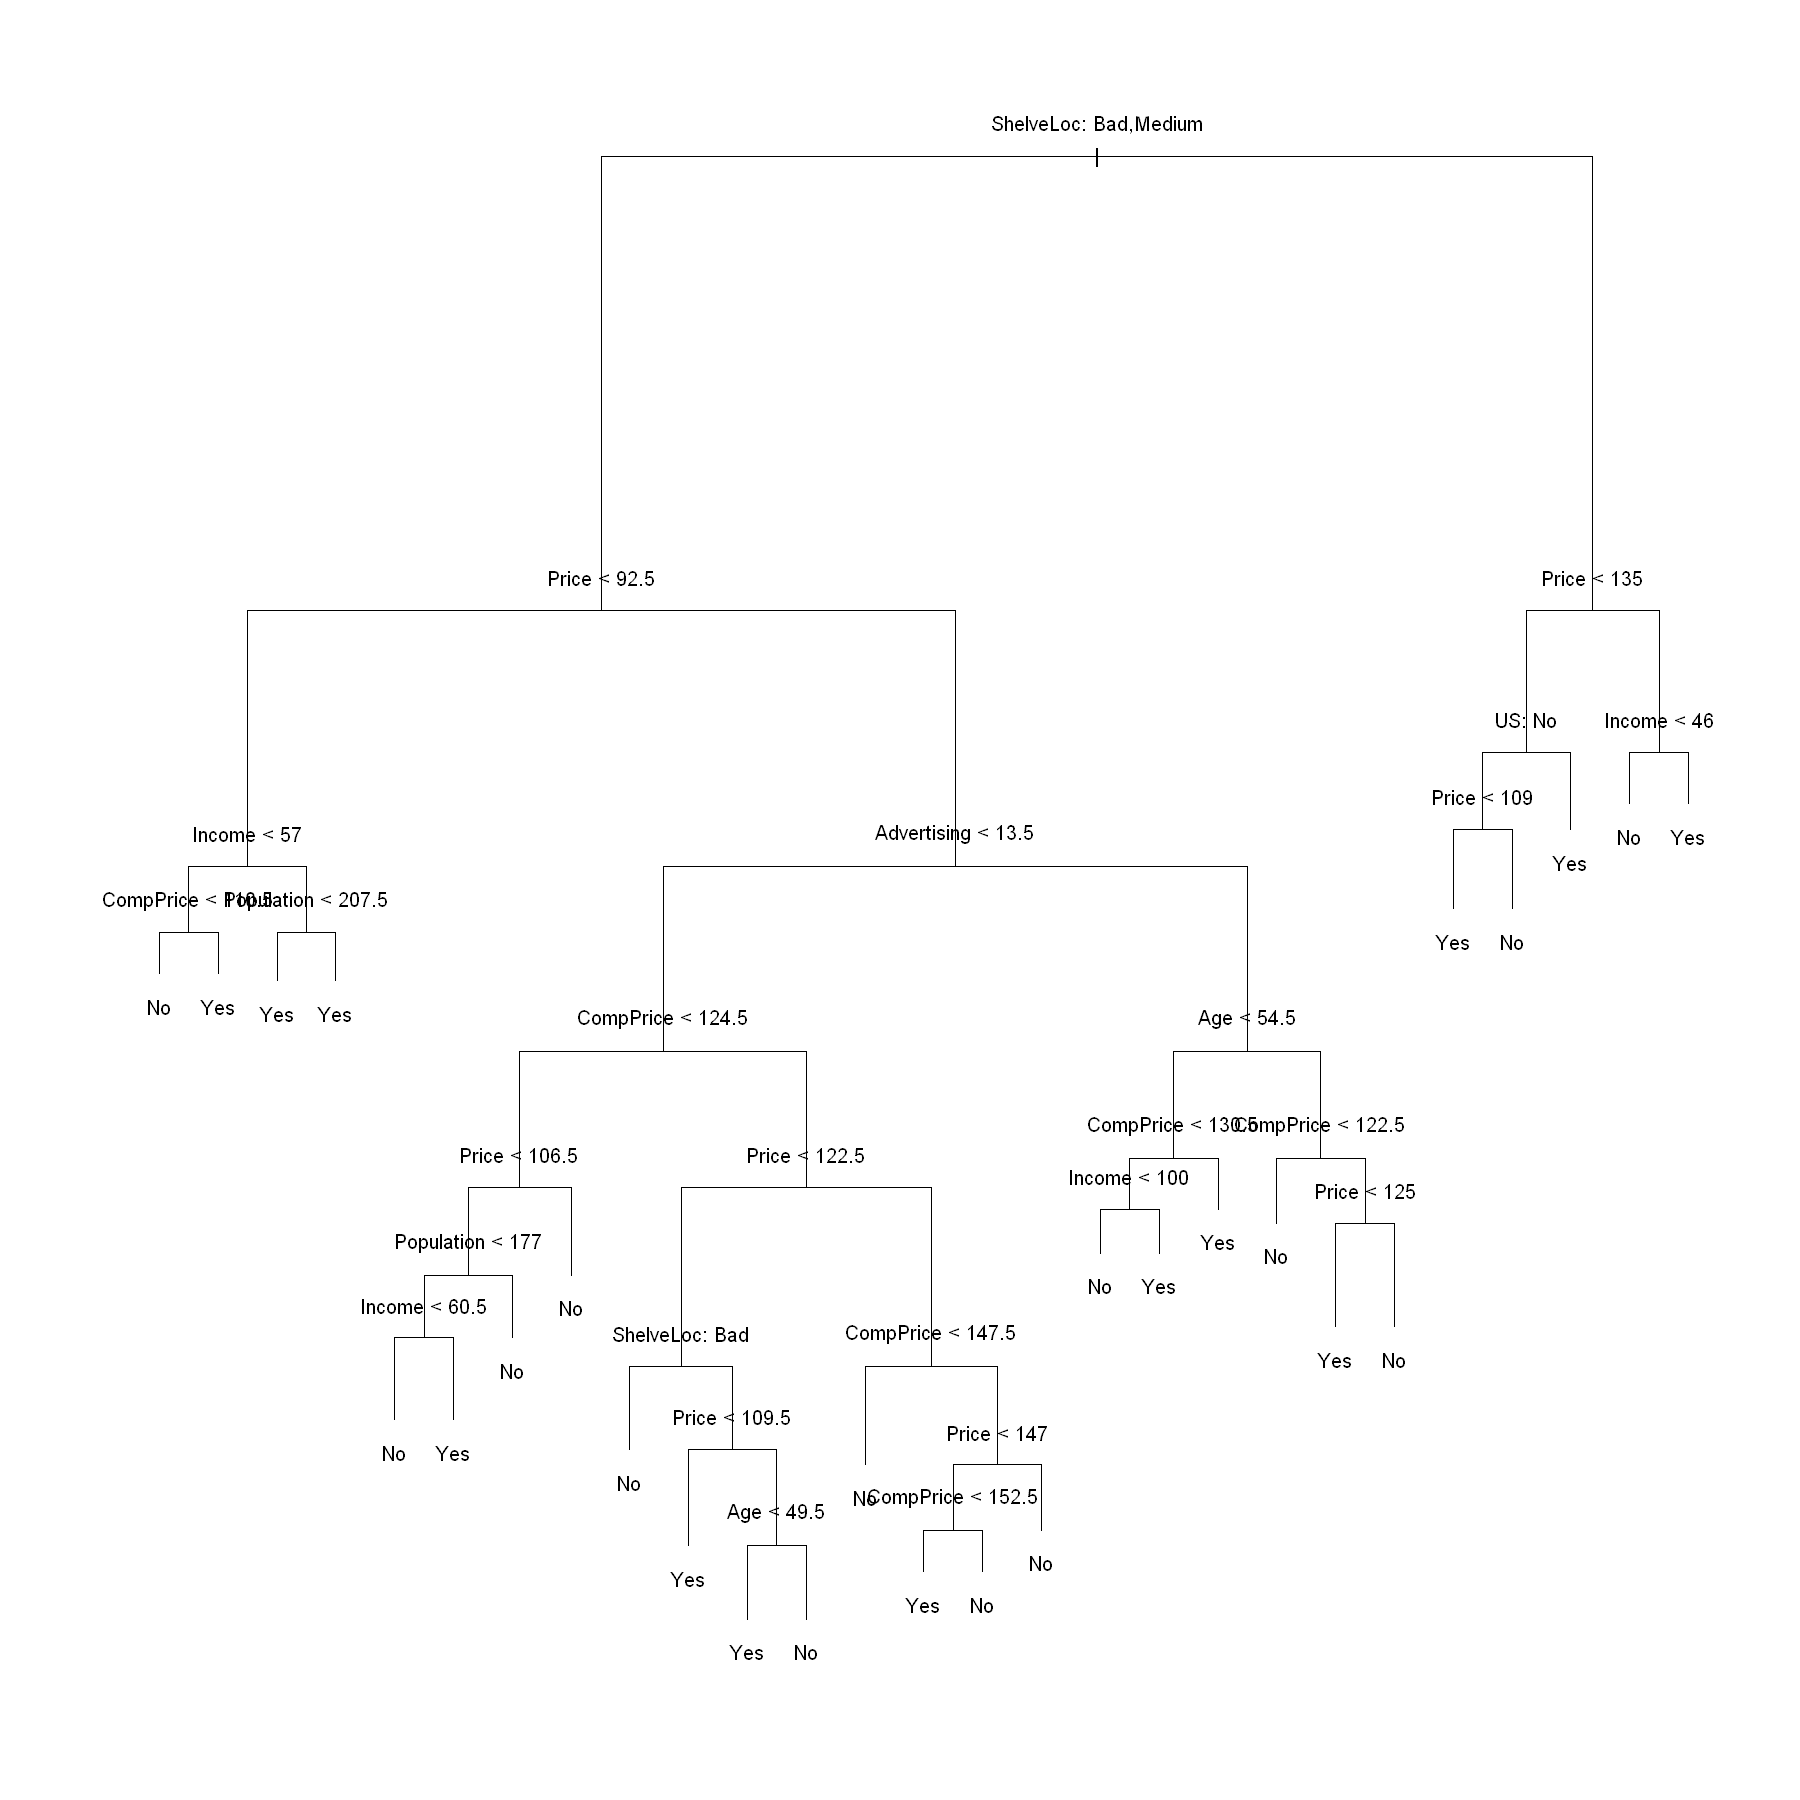

In [114]:
# Show the Decision Tree
options(repr.plot.width=15, repr.plot.height=15)
plot(md_tree)
text(md_tree, pretty=0)

In [117]:
# The Decision Tree model in detailed
# Ref: https://stats.stackexchange.com/questions/6581/what-is-deviance-specifically-in-cart-rpart
md_tree

node), split, n, deviance, yval, (yprob)
      * denotes terminal node

  1) root 400 541.500 No ( 0.59000 0.41000 )  
    2) ShelveLoc: Bad,Medium 315 390.600 No ( 0.68889 0.31111 )  
      4) Price < 92.5 46  56.530 Yes ( 0.30435 0.69565 )  
        8) Income < 57 10  12.220 No ( 0.70000 0.30000 )  
         16) CompPrice < 110.5 5   0.000 No ( 1.00000 0.00000 ) *
         17) CompPrice > 110.5 5   6.730 Yes ( 0.40000 0.60000 ) *
        9) Income > 57 36  35.470 Yes ( 0.19444 0.80556 )  
         18) Population < 207.5 16  21.170 Yes ( 0.37500 0.62500 ) *
         19) Population > 207.5 20   7.941 Yes ( 0.05000 0.95000 ) *
      5) Price > 92.5 269 299.800 No ( 0.75465 0.24535 )  
       10) Advertising < 13.5 224 213.200 No ( 0.81696 0.18304 )  
         20) CompPrice < 124.5 96  44.890 No ( 0.93750 0.06250 )  
           40) Price < 106.5 38  33.150 No ( 0.84211 0.15789 )  
             80) Population < 177 12  16.300 No ( 0.58333 0.41667 )  
              160) Income < 60.5 6   0

**1.3. Evaluate the Decision Tree model with train/test set**

In [488]:
# Separate train/test
set.seed(2)
train_idx <- sample(1:nrow(cs), 200)
train <- cs[train_idx, ]
test <- cs[-train_idx, ]

In [489]:
# Fit Decision Tree on train dataset
md_tree <- tree(High ~ ., data=train)

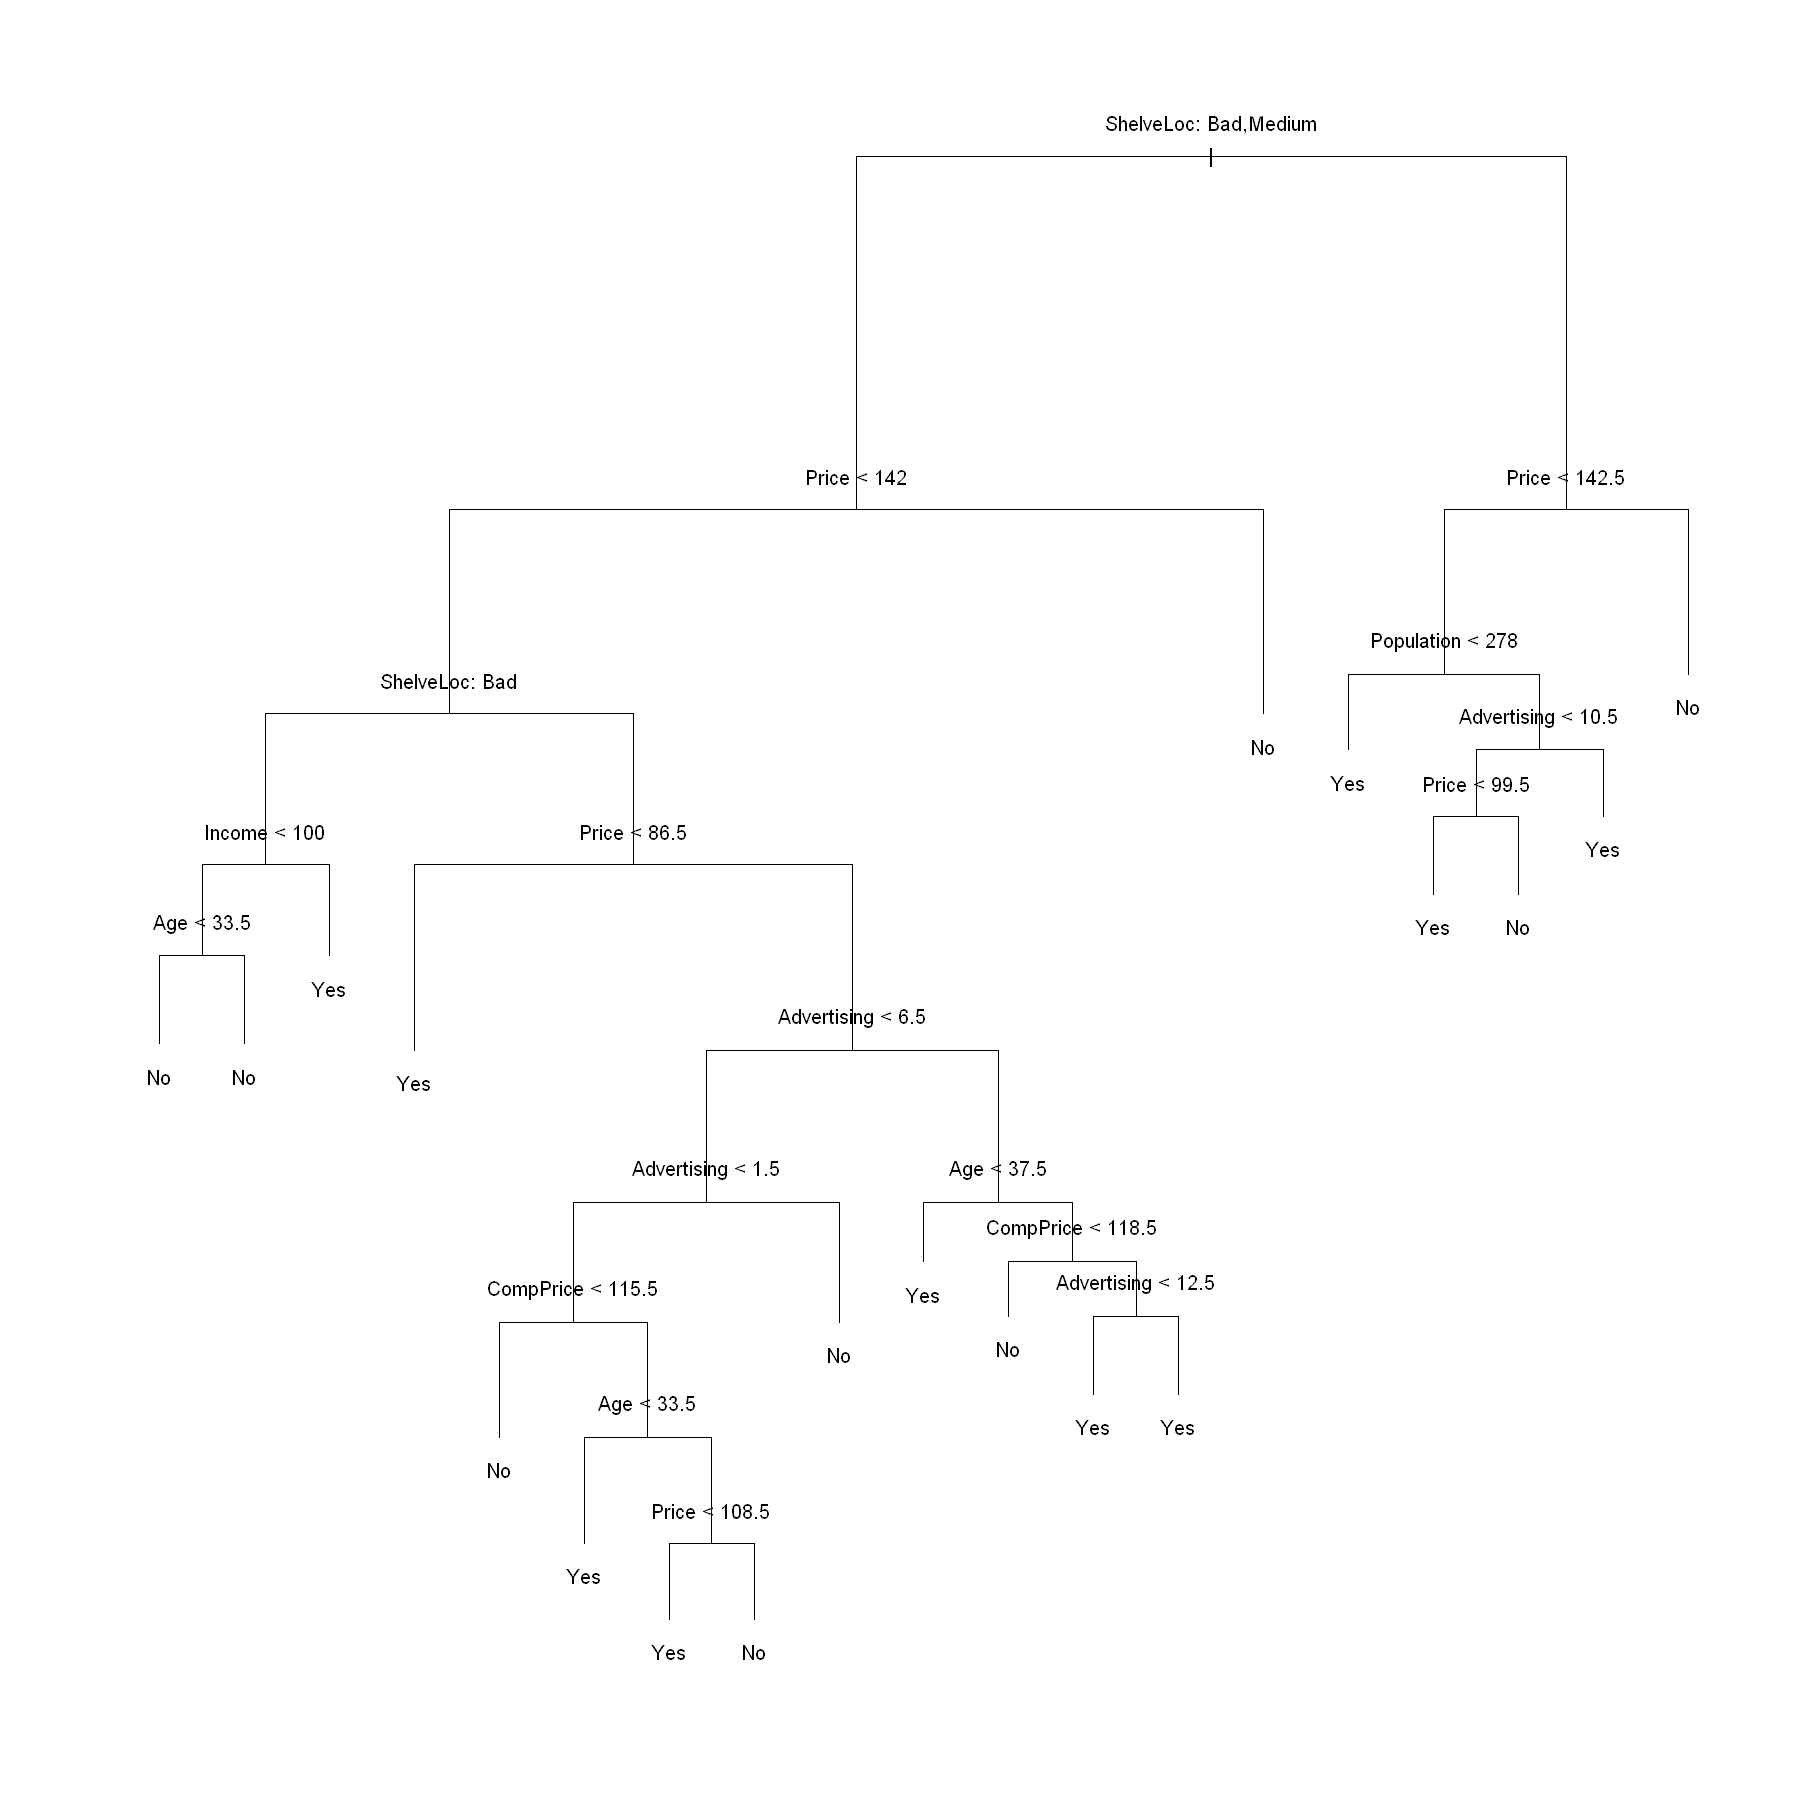

In [490]:
# Show the Decision Tree
options(repr.plot.width=15, repr.plot.height=15)
plot(md_tree)
text(md_tree, pretty=0)

In [125]:
# Make the prediction
pred <- predict(md_tree, newdata=test, type='class')

# Evaluation: confusion matrix
table(pred, test$High)

# Accuracy
mean(pred == test$High)

     
pred  No Yes
  No  88  28
  Yes 28  56

[1] 0.72

**1.4. Prune Decision Tree**

In [129]:
# Prune the previous tree using error rate
set.seed(3)
cv_cs <- cv.tree(md_tree, FUN=prune.misclass)
cv_cs

$size
[1] 19 17 14 13  9  7  3  2  1

$dev
[1] 55 55 53 52 50 56 69 65 80

$k
[1]       -Inf  0.0000000  0.6666667  1.0000000  1.7500000  2.0000000  4.2500000
[8]  5.0000000 23.0000000

$method
[1] "misclass"

attr(,"class")
[1] "prune"         "tree.sequence"

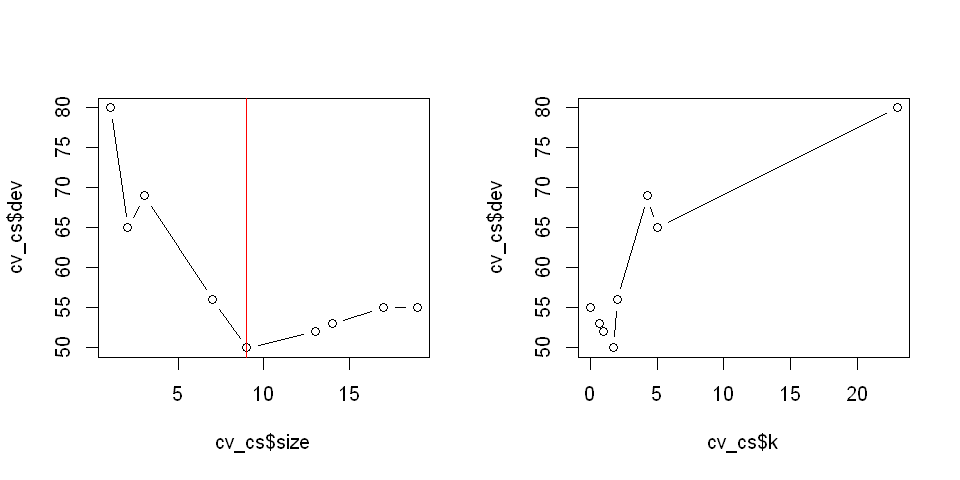

In [136]:
# Show the Decision Tree
options(repr.plot.width=8, repr.plot.height=4)
par(mfrow=c(1, 2))
plot(cv_cs$size, cv_cs$dev, type='b')  # Tree size, number of nodes
abline(v=9, col='red')  # Best tree size
plot(cv_cs$k, cv_cs$dev, type='b')  # Cost-complexity param, alpha

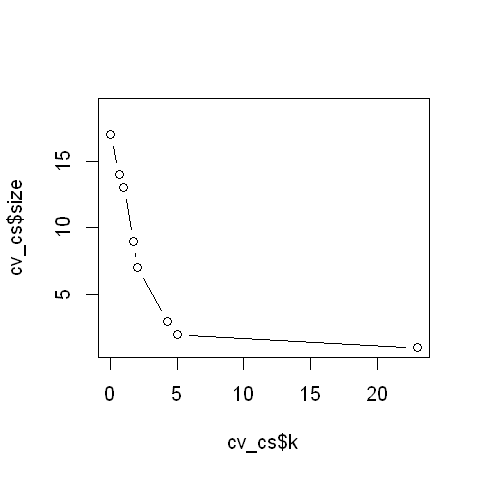

In [227]:
# Show the Decision Tree
options(repr.plot.width=4, repr.plot.height=4)
plot(cv_cs$k, cv_cs$size, type='b')

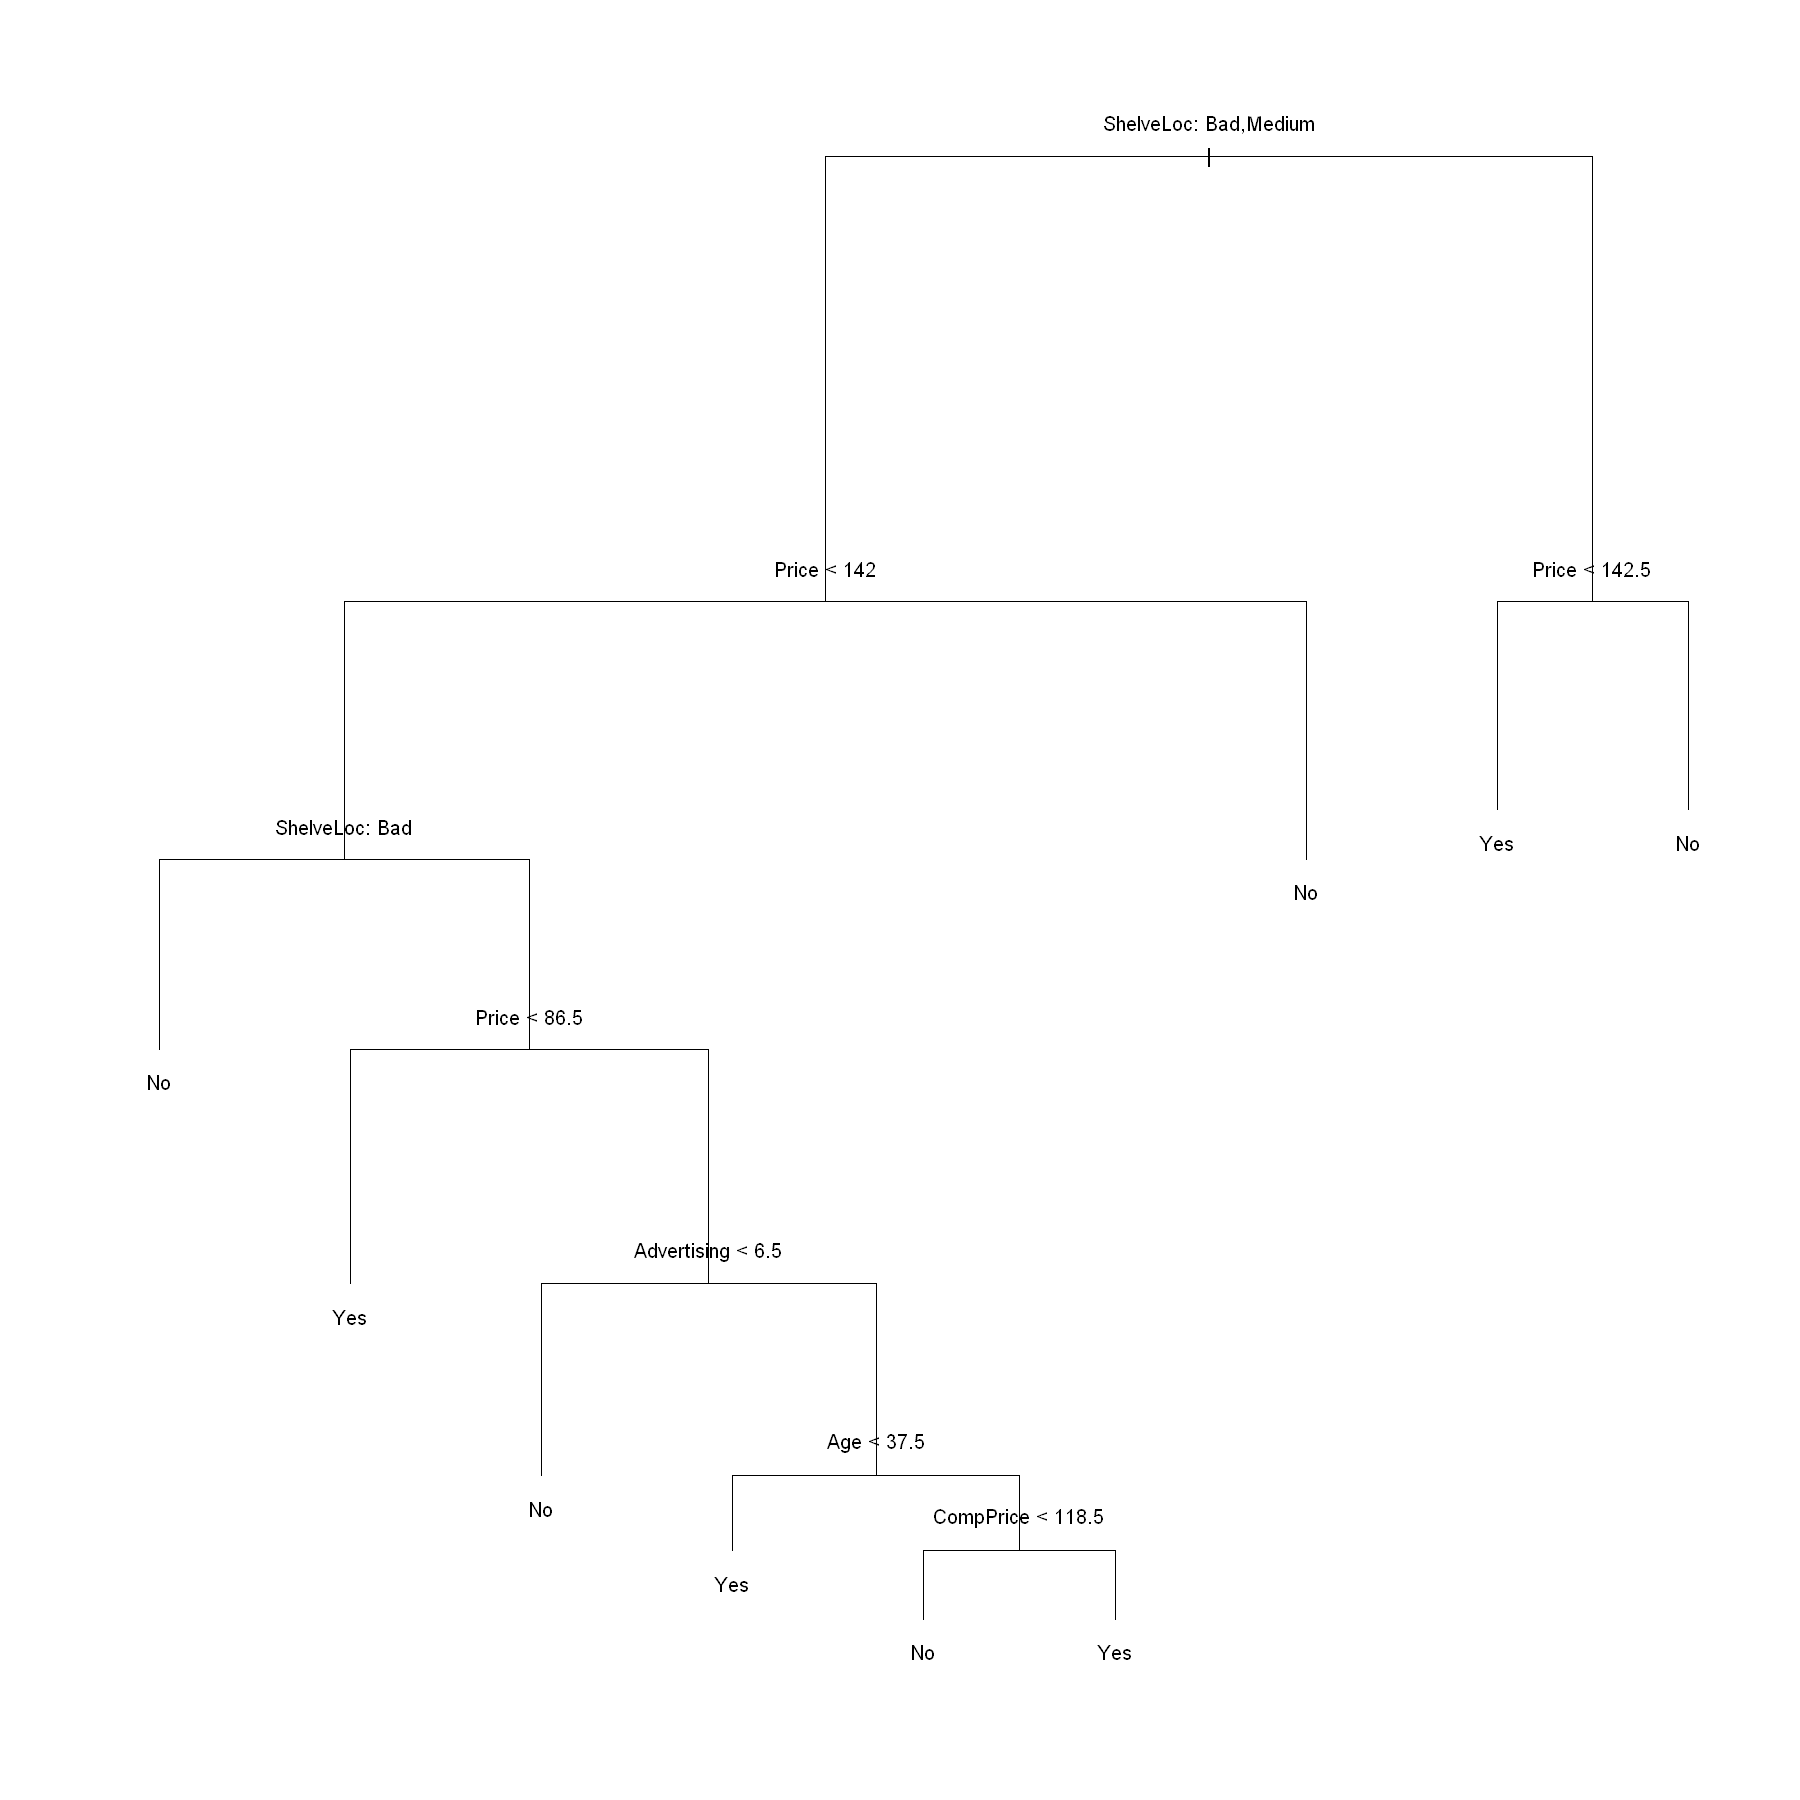

In [137]:
# Prune the tree to 9 nodes
prune_tree <- prune.misclass(md_tree, best=9)

# Show the tree
options(repr.plot.width=15, repr.plot.height=15)
plot(prune_tree)
text(prune_tree, pretty=0)

In [138]:
# Check the performance of the pruned tree
pred_pruned <- predict(prune_tree, newdata=test, type='class')

# Evaluation: confusion matrix
table(pred_pruned, test$High)

# Accuracy
mean(pred_pruned == test$High)

           
pred_pruned No Yes
        No  94  24
        Yes 22  60

[1] 0.77

### Lab 2: Cars Sales Data - Regression Tree

**2.1. Import, explore and prepare data**

In [139]:
# Load require packages
library(tree)  # Regression and classification tree
library(MASS)  # Housing dataset

In [141]:
# Load and explore the dataset
bt <- MASS::Boston
str(bt)

'data.frame':	506 obs. of  14 variables:
 $ crim   : num  0.00632 0.02731 0.02729 0.03237 0.06905 ...
 $ zn     : num  18 0 0 0 0 0 12.5 12.5 12.5 12.5 ...
 $ indus  : num  2.31 7.07 7.07 2.18 2.18 2.18 7.87 7.87 7.87 7.87 ...
 $ chas   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ nox    : num  0.538 0.469 0.469 0.458 0.458 0.458 0.524 0.524 0.524 0.524 ...
 $ rm     : num  6.58 6.42 7.18 7 7.15 ...
 $ age    : num  65.2 78.9 61.1 45.8 54.2 58.7 66.6 96.1 100 85.9 ...
 $ dis    : num  4.09 4.97 4.97 6.06 6.06 ...
 $ rad    : int  1 2 2 3 3 3 5 5 5 5 ...
 $ tax    : num  296 242 242 222 222 222 311 311 311 311 ...
 $ ptratio: num  15.3 17.8 17.8 18.7 18.7 18.7 15.2 15.2 15.2 15.2 ...
 $ black  : num  397 397 393 395 397 ...
 $ lstat  : num  4.98 9.14 4.03 2.94 5.33 ...
 $ medv   : num  24 21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 ...


In [142]:
# Check NAs
apply(is.na(bt), 2, sum)

crim      zn   indus    chas     nox      rm     age     dis     rad     tax 
      0       0       0       0       0       0       0       0       0       0 
ptratio   black   lstat    medv 
      0       0       0       0

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   5.00   17.02   21.20   22.53   25.00   50.00 

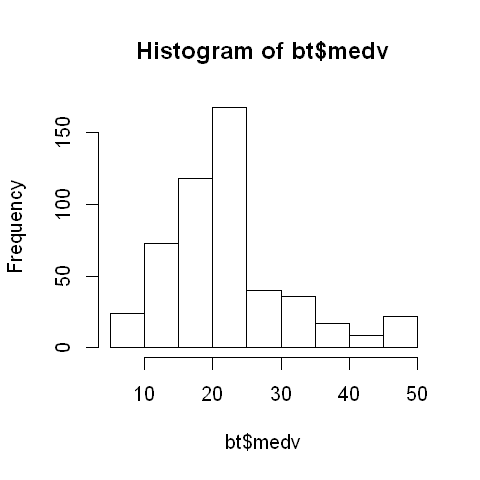

In [149]:
# Check the target variable: median house price
summary(bt$medv)

options(repr.plot.width=4, repr.plot.height=4)
hist(bt$medv)

**2.2. Evaluate the Regression Tree model with train/test set**

In [144]:
# Separate train/test
set.seed(1)
train_idx <- sample(1:nrow(bt), nrow(bt) / 2)
train <- bt[train_idx, ]
test <- bt[-train_idx, ]

In [146]:
# Fit Decision Tree on train dataset
md_rtree <- tree(medv ~ ., data=train)
summary(md_rtree)


Regression tree:
tree(formula = medv ~ ., data = train)
Variables actually used in tree construction:
[1] "lstat" "rm"    "dis"  
Number of terminal nodes:  8 
Residual mean deviance:  12.65 = 3099 / 245 
Distribution of residuals:
     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
-14.10000  -2.04200  -0.05357   0.00000   1.96000  12.60000 

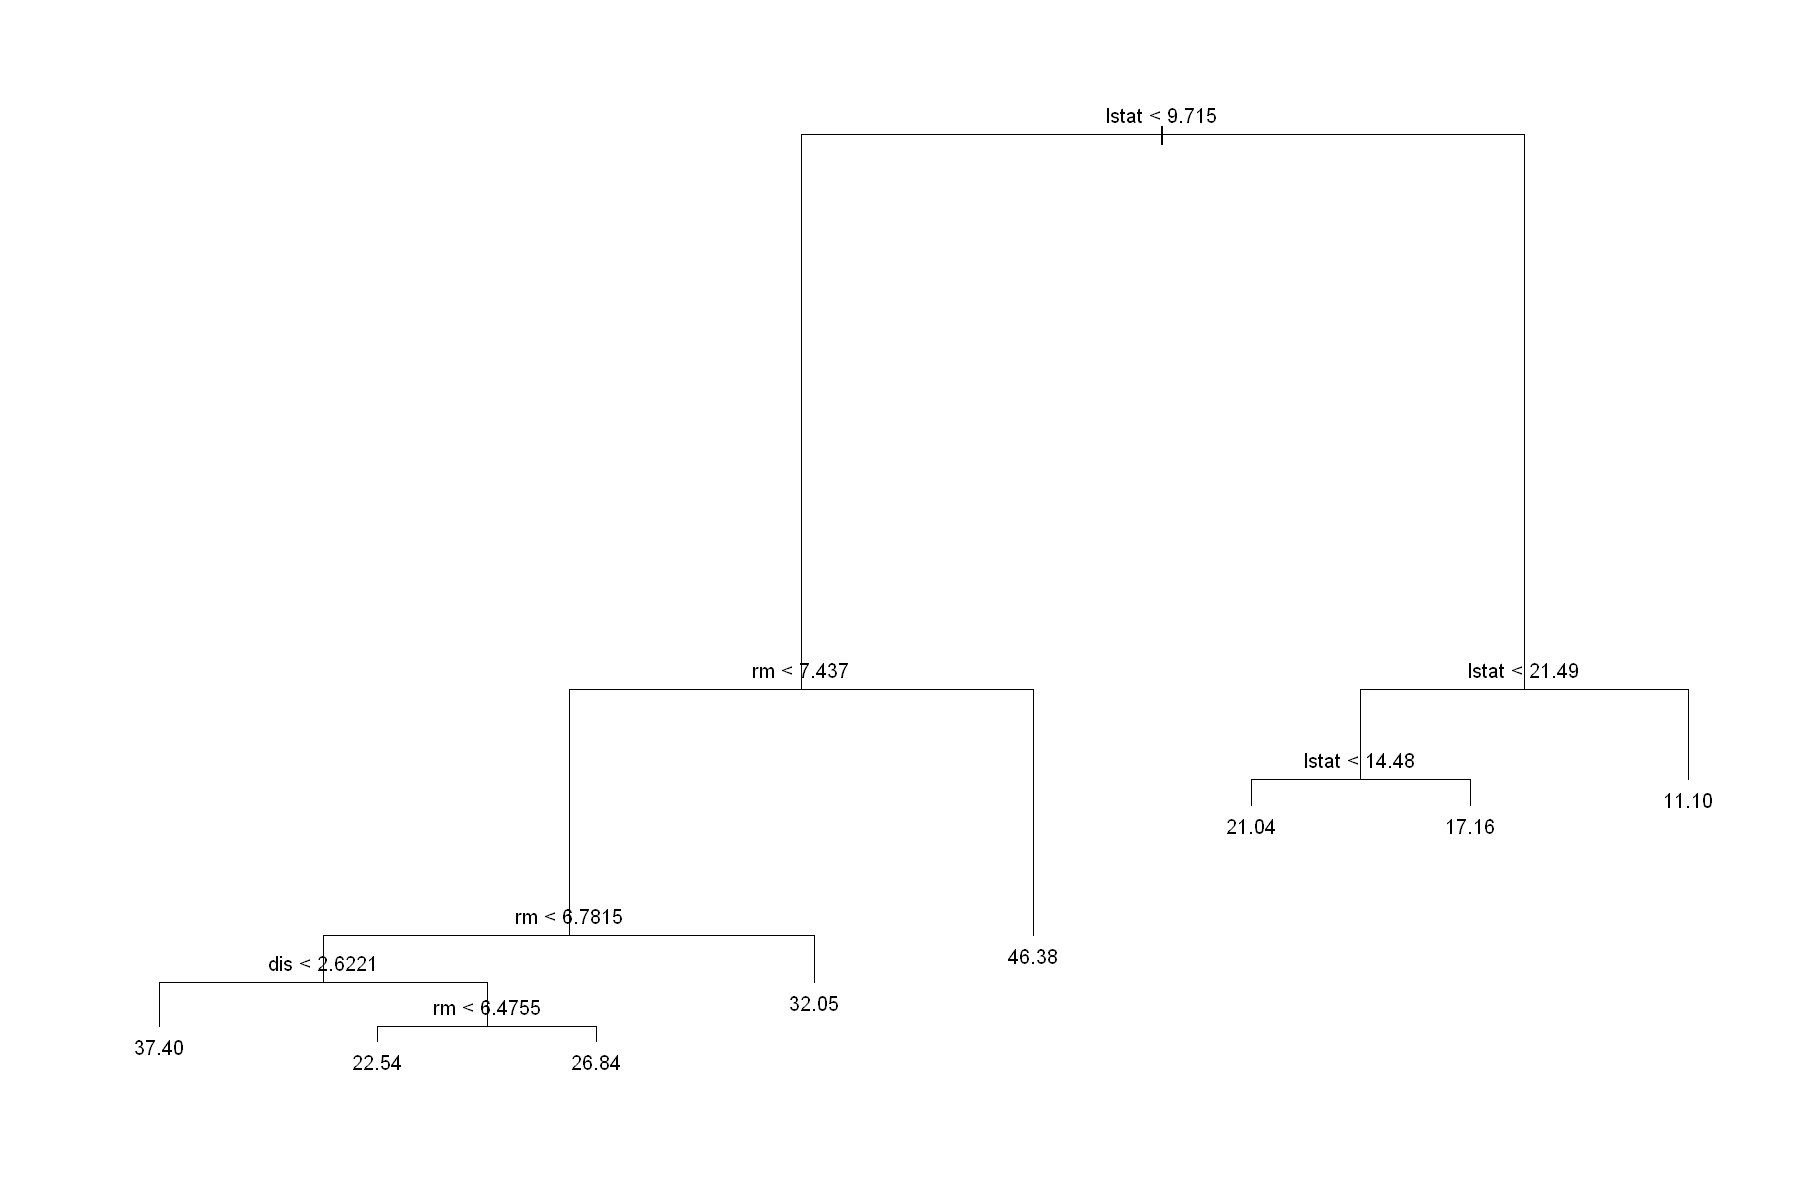

In [148]:
# Show the Decision Tree
options(repr.plot.width=15, repr.plot.height=10)
plot(md_rtree)
text(md_rtree, pretty=0)

In [154]:
# Make the prediction
pred <- predict(md_rtree, newdata=test)

# Evaluation: MSE
mean((pred - test$medv) ^ 2)

[1] 25.04559

**2.3. Prune and evaluate Regression Tree**

In [155]:
# Prune the previous tree using error rate
set.seed(3)
cv_bt <- cv.tree(md_rtree)
cv_bt

$size
[1] 8 7 6 5 4 3 2 1

$dev
[1]  5335.721  5988.901  6671.685  7349.550  7388.893  8812.276 14707.294
[8] 21035.642

$k
[1]      -Inf  255.6581  451.9272  768.5087  818.8885 1559.1264 4276.5803
[8] 9665.3582

$method
[1] "deviance"

attr(,"class")
[1] "prune"         "tree.sequence"

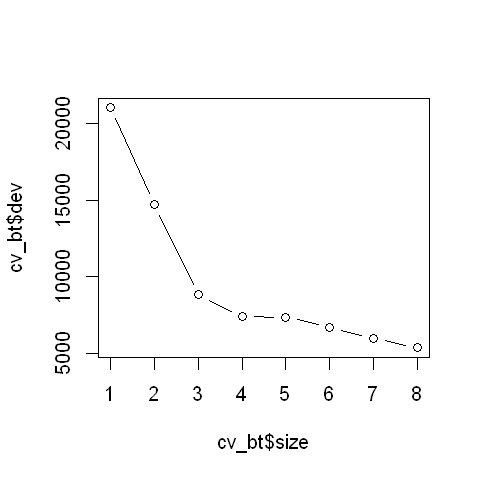

In [158]:
# Show the Decision Tree
options(repr.plot.width=4, repr.plot.height=4)
plot(cv_bt$size, cv_bt$dev, type='b')  # Tree size, number of nodes
abline(v=9, col='red')  # Best tree size

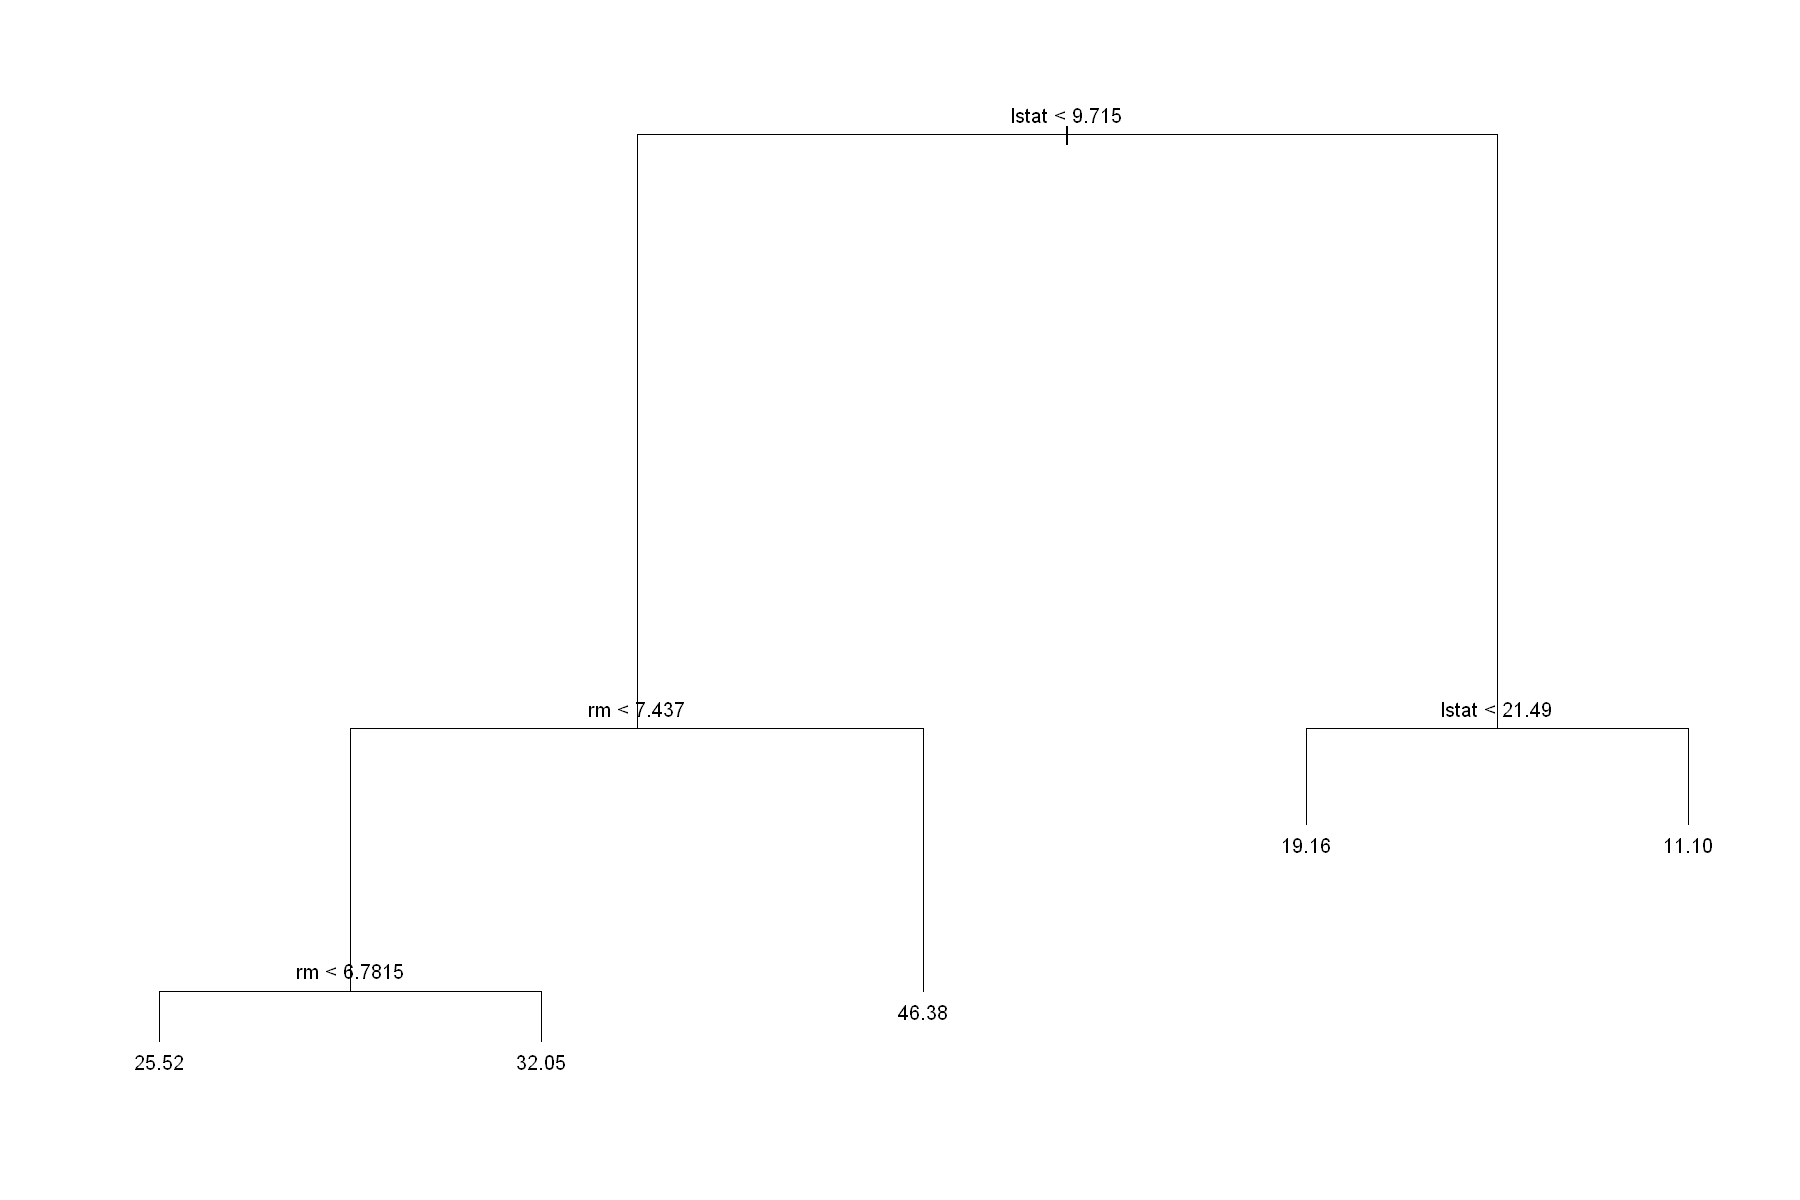

In [160]:
# Prune the tree to 5 nodes
prune_rtree <- prune.tree(md_rtree, best=5)

# Show the tree
options(repr.plot.width=15, repr.plot.height=10)
plot(prune_rtree)
text(prune_rtree, pretty=0)

In [161]:
# Check the performance of the pruned tree
pred_pruned <- predict(prune_rtree, newdata=test)

# Evaluation: MSE
mean((pred_pruned - test$medv) ^ 2)

[1] 26.83413

### Lab 3: Boston Housing Data - Bagging and Random Forests

**3.1. Bagging Regression Tree**

In [162]:
# Load required libaries and data
library(randomForest)  # Random Forests model
library(MASS)  # Boston housing data

randomForest 4.6-12
Type rfNews() to see new features/changes/bug fixes.

Attaching package: 'randomForest'

The following object is masked from 'package:ggplot2':

    margin



In [163]:
# Import data
house <- MASS::Boston
str(house)

'data.frame':	506 obs. of  14 variables:
 $ crim   : num  0.00632 0.02731 0.02729 0.03237 0.06905 ...
 $ zn     : num  18 0 0 0 0 0 12.5 12.5 12.5 12.5 ...
 $ indus  : num  2.31 7.07 7.07 2.18 2.18 2.18 7.87 7.87 7.87 7.87 ...
 $ chas   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ nox    : num  0.538 0.469 0.469 0.458 0.458 0.458 0.524 0.524 0.524 0.524 ...
 $ rm     : num  6.58 6.42 7.18 7 7.15 ...
 $ age    : num  65.2 78.9 61.1 45.8 54.2 58.7 66.6 96.1 100 85.9 ...
 $ dis    : num  4.09 4.97 4.97 6.06 6.06 ...
 $ rad    : int  1 2 2 3 3 3 5 5 5 5 ...
 $ tax    : num  296 242 242 222 222 222 311 311 311 311 ...
 $ ptratio: num  15.3 17.8 17.8 18.7 18.7 18.7 15.2 15.2 15.2 15.2 ...
 $ black  : num  397 397 393 395 397 ...
 $ lstat  : num  4.98 9.14 4.03 2.94 5.33 ...
 $ medv   : num  24 21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 ...


In [164]:
# Separate train/test
set.seed(1)
train_idx <- sample(1:nrow(house), nrow(house) / 2)
train <- bt[train_idx, ]
test <- bt[-train_idx, ]

In [167]:
# Fit bagging model, use all predictors
md_bagtree <- randomForest(medv ~ ., data=train, mtry=13, importance=T)
md_bagtree


Call:
 randomForest(formula = medv ~ ., data = train, mtry = 13, importance = T) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 13

          Mean of squared residuals: 11.02164
                    % Var explained: 86.65

[1] 13.2969

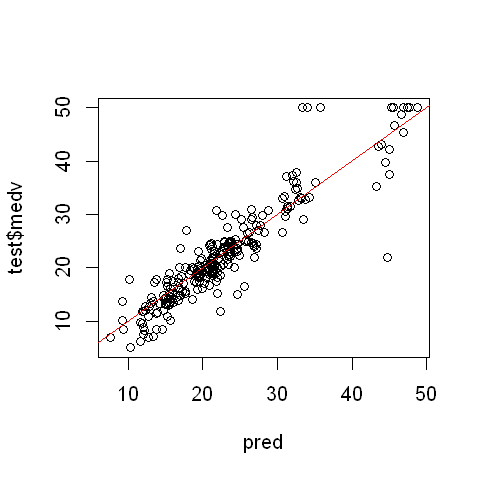

In [172]:
# Make prediction
pred <- predict(md_bagtree, newdata=test)

options(repr.plot.width=4, repr.plot.height=4)
plot(pred, test$medv)
abline(0, 1, col='red')

# MSE
mean((pred - test$medv) ^ 2)

In [180]:
# Fit bagging model with different number of trees
md_bagtree <- randomForest(medv ~ ., data=train, mtry=13, ntree=25, importance=T)
pred <- predict(md_bagtree, newdata=test)

# Evaluation: MSE
mean((pred - test$medv) ^ 2)

[1] 12.76678

**3.2. Random Forests**

In [181]:
# Fit random forests model
set.seed(1)
md_rf <- randomForest(medv ~ ., data=train, mtry=6, importance=T)  # Default mtry = p/3
md_rf


Call:
 randomForest(formula = medv ~ ., data = train, mtry = 6, importance = T) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 6

          Mean of squared residuals: 12.09928
                    % Var explained: 85.35

In [189]:
# Make prediction
pred_rf <- predict(md_rf, newdata=test)

# Evaluation: MSE
mean((pred_rf - test$medv) ^ 2)

[1] 11.48022

In [191]:
# Feature importance
importance(md_rf)

,%IncMSE,IncNodePurity
crim,12.547772,1094.65382
zn,1.375489,64.40060
indus,9.304258,1086.09103
chas,2.518766,76.36804
nox,12.835614,1008.73703
rm,31.646147,6705.02638
age,9.970243,575.13702
dis,12.774430,1351.01978
rad,3.911852,93.78200
tax,7.624043,453.19472


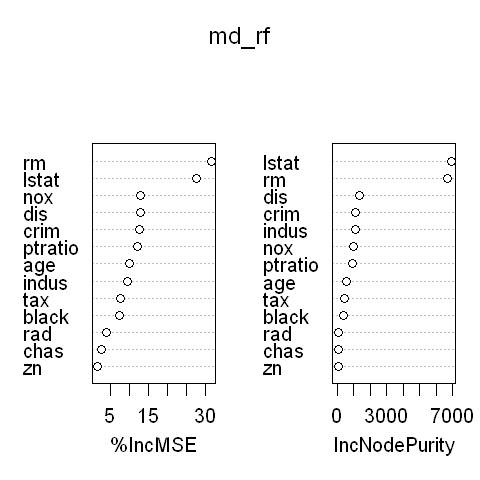

In [195]:
# Plot feature importance
varImpPlot(md_rf)

### Lab 4: Boston Housing Data - Boosting Regression Tree

In [196]:
# Load required libaries and data
library(gbm)  # Boosting library
library(MASS)  # Boston housing data

Loading required package: survival

Attaching package: 'survival'

The following object is masked from 'package:caret':

    cluster

Loading required package: splines
Loading required package: parallel
Loaded gbm 2.1.3


In [163]:
# Import data
house <- MASS::Boston
str(house)

'data.frame':	506 obs. of  14 variables:
 $ crim   : num  0.00632 0.02731 0.02729 0.03237 0.06905 ...
 $ zn     : num  18 0 0 0 0 0 12.5 12.5 12.5 12.5 ...
 $ indus  : num  2.31 7.07 7.07 2.18 2.18 2.18 7.87 7.87 7.87 7.87 ...
 $ chas   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ nox    : num  0.538 0.469 0.469 0.458 0.458 0.458 0.524 0.524 0.524 0.524 ...
 $ rm     : num  6.58 6.42 7.18 7 7.15 ...
 $ age    : num  65.2 78.9 61.1 45.8 54.2 58.7 66.6 96.1 100 85.9 ...
 $ dis    : num  4.09 4.97 4.97 6.06 6.06 ...
 $ rad    : int  1 2 2 3 3 3 5 5 5 5 ...
 $ tax    : num  296 242 242 222 222 222 311 311 311 311 ...
 $ ptratio: num  15.3 17.8 17.8 18.7 18.7 18.7 15.2 15.2 15.2 15.2 ...
 $ black  : num  397 397 393 395 397 ...
 $ lstat  : num  4.98 9.14 4.03 2.94 5.33 ...
 $ medv   : num  24 21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 ...


In [164]:
# Separate train/test
set.seed(1)
train_idx <- sample(1:nrow(house), nrow(house) / 2)
train <- bt[train_idx, ]
test <- bt[-train_idx, ]

,var,rel.inf
lstat,lstat,45.9627334
rm,rm,31.2238187
dis,dis,6.8087398
crim,crim,4.0743784
nox,nox,2.5605001
ptratio,ptratio,2.2748652
black,black,1.7971159
age,age,1.6488532
tax,tax,1.3595005
indus,indus,1.2705924


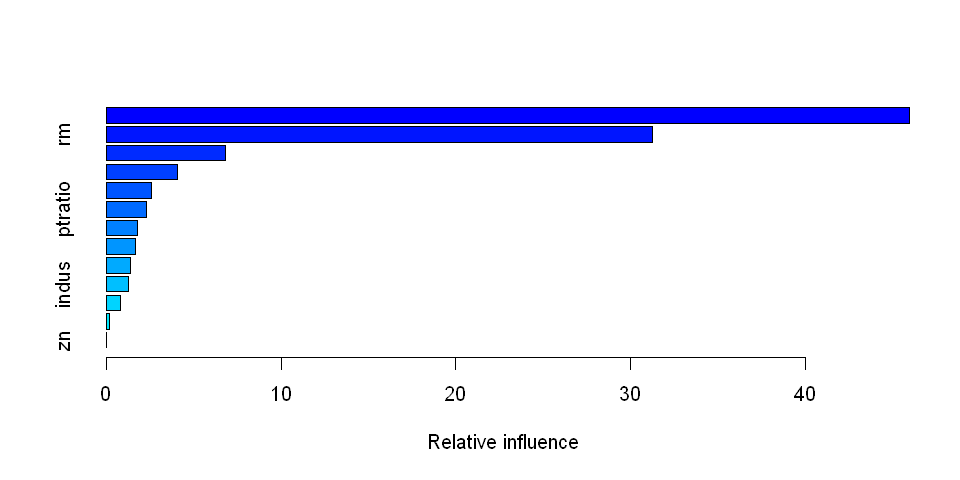

In [203]:
# Fit boosting regression tree
set.seed(1)
md_boosttree <- gbm(medv ~ ., data=train, distribution='gaussian',
                    n.trees=5000, interaction.depth=4)
summary(md_boosttree)

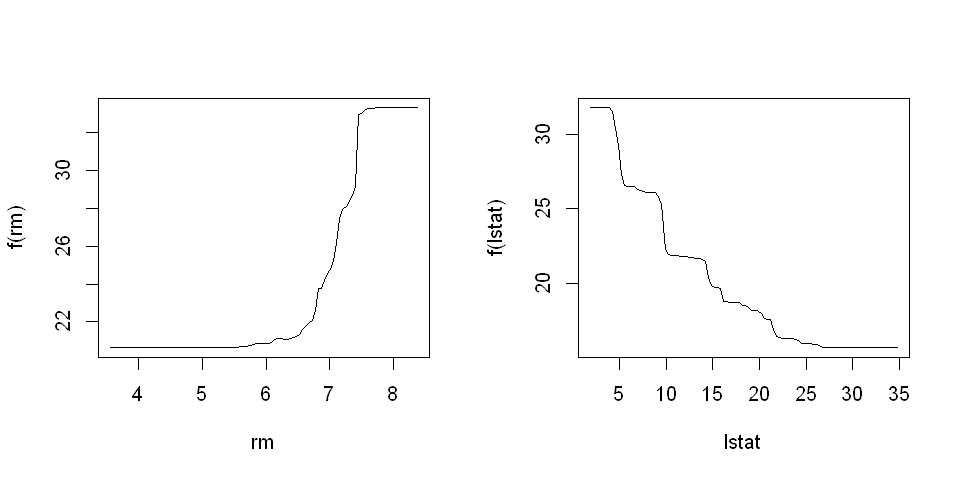

In [204]:
# Partial dependence plots
options(repr.plot.width=8, repr.plot.height=4)
par(mfrow=c(1, 2))
plot(md_boosttree, i='rm')
plot(md_boosttree, i='lstat')

In [205]:
# Make prediction
pred <- predict(md_boosttree, newdata=test, n.trees=5000)

# MSE
mean((pred - test$medv) ^ 2)

[1] 11.84434

In [216]:
# Fit boosting model with different shrinkage param, default alpha = 0.001
set.seed(3)
md_boosttree <- gbm(medv ~ ., data=train, distribution='gaussian',
                    n.trees=5000, interaction.depth=4, shrinkage=0.2,
                    verbose=F)

# Make prediction
pred <- predict(md_boosttree, newdata=test, n.trees=5000)

# Evaluation: MSE
mean((pred - test$medv) ^ 2)

[1] 11.01153